<a href="https://colab.research.google.com/github/Ayushi-bhutani/Spam_sms_detection/blob/main/spam_sms_detection_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('SPAM.csv')

In [ ]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5273,ham,Its too late:)but its k.wish you the same.,NaN,NaN,NaN
5487,spam,2p per min to call Germany 08448350055 from yo...,NaN,NaN,NaN
1529,ham,Should I have picked up a receipt or something...,NaN,NaN,NaN
5533,ham,"Hey chief, can you give me a bell when you get...",NaN,NaN,NaN
4362,ham,Evry Emotion dsn't hav Words.Evry Wish dsn't h...,NaN,NaN,NaN
1485,ham,(I should add that I don't really care and if ...,NaN,NaN,NaN
3958,ham,Have a nice day my dear.,NaN,NaN,NaN
2685,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
5531,ham,Compliments to you. Was away from the system. ...,NaN,NaN,NaN
3673,spam,You have won a Nokia 7250i. This is what you g...,NaN,NaN,NaN


In [ ]:
#Steps we will follow goinf forward...
#1. Data Cleaning
#2. EDA (Exploratory Data Analysis)
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvements
#7. Website
#8. Deployment

DATA CLEANING


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Removing/Dropping last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
# In the above cell we have removed the last 3 cols, now we will look at the updated data frame again...
df.sample(10)

,v1,v2
4593,ham,I had a good time too. Its nice to do somethin...
1334,ham,Oh ! A half hour is much longer in Syria than ...
171,ham,"Hmmm.. Thk sure got time to hop ard... Ya, can..."
1491,spam,Your account has been credited with 500 FREE T...
2343,ham,1) Go to write msg 2) Put on Dictionary mode 3...
5192,ham,Oh oh... Den muz change plan liao... Go back h...
1706,ham,Yes! I am a one woman man! Please tell me your...
4341,ham,Ha! I wouldn't say that I just didn't read any...
4871,ham,Hi dis is yijue i would be happy to work wif �...
28,ham,"I'm back &amp; we're packing the car now, I'll..."


In [ ]:
# Renaming the cols, as they are not descriptive...
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)

In [ ]:
df.sample(10)

,Target,Text
1508,ham,Sounds like something that someone testing me ...
1733,spam,"Hi, this is Mandy Sullivan calling from HOTMIX..."
5543,ham,U still havent got urself a jacket ah?
5042,ham,O ic lol. Should play 9 doors sometime yo
27,ham,Did you catch the bus ? Are you frying an egg ...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
2798,ham,I've told him that i've returned it. That shou...
3260,ham,Yup i'm still having coffee wif my frens... My...
603,ham,Be happy there. I will come after noon
264,ham,Why you Dint come with us.


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [ ]:
df.head(10)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [ ]:
# Now lets check is there any missing value or not...
df.isnull().sum()

,0
Target,0
Text,0


In [ ]:
# Now lets check whether there are any duplicate values or not!
df.duplicated().sum()

403

In [ ]:
# Removing duplicates!
df = df.drop_duplicates(keep='first')
# All the duplicates are removed here!

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

2. EDA (Exploratory Data Analysis)

In [ ]:
# Now we will go further will data analysis!
# We will check how much part of the data is spam and how much is ham!
# Proceeding further with this analysis...
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Target'].value_counts()

,count
Target,
0,4516
1,653


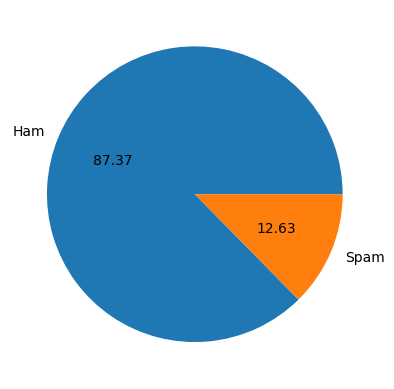

In [ ]:
# To plot the piechart we will use the matplotlib library of python!
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['Ham','Spam'], autopct='%0.2f')
plt.show() # To remove the xtra piece of code we used this

In [ ]:
import nltk # For the above analysis we need to use nltk library


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['Text'].apply(len)

In [ ]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:

df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Now we will analyse all the above columns using describe function...
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# From the above tables we can notice that, on an average 78 characters are used, 18 words are used and approx 2 sentences are used
# And max to max in a message, 910 characters are used, 220 words are used and 38 sentences are used!
# In the above table we have analysed it for in general all msgs...
# But now we will analyse it for specifically for ham msgs...
df[df['Target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

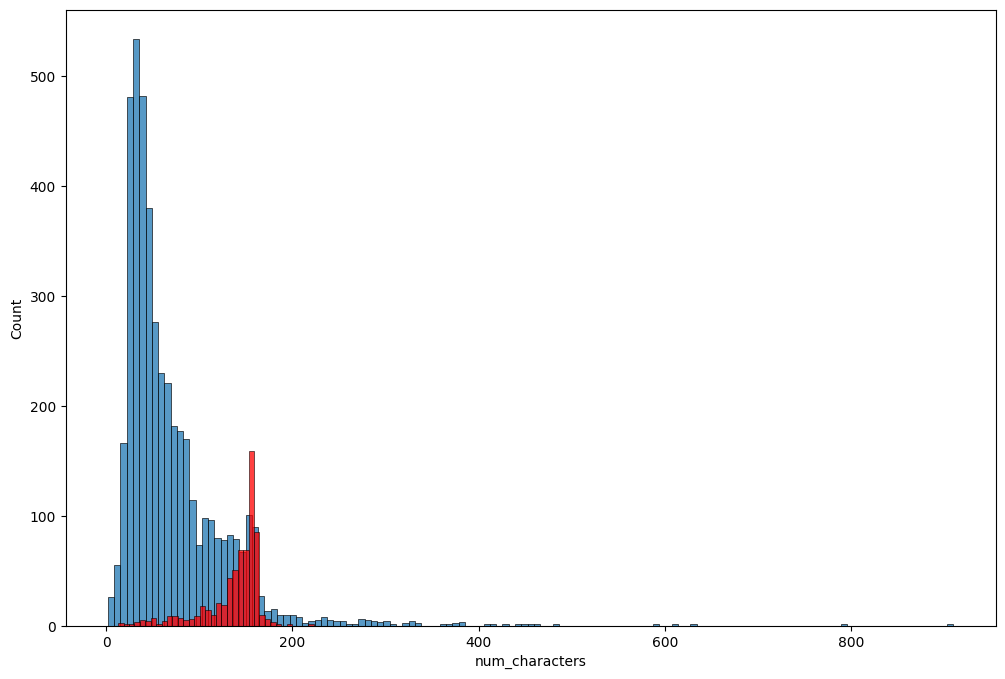

In [ ]:
plt.figure(figsize=(12,8)) # To increase the size of the graph!
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

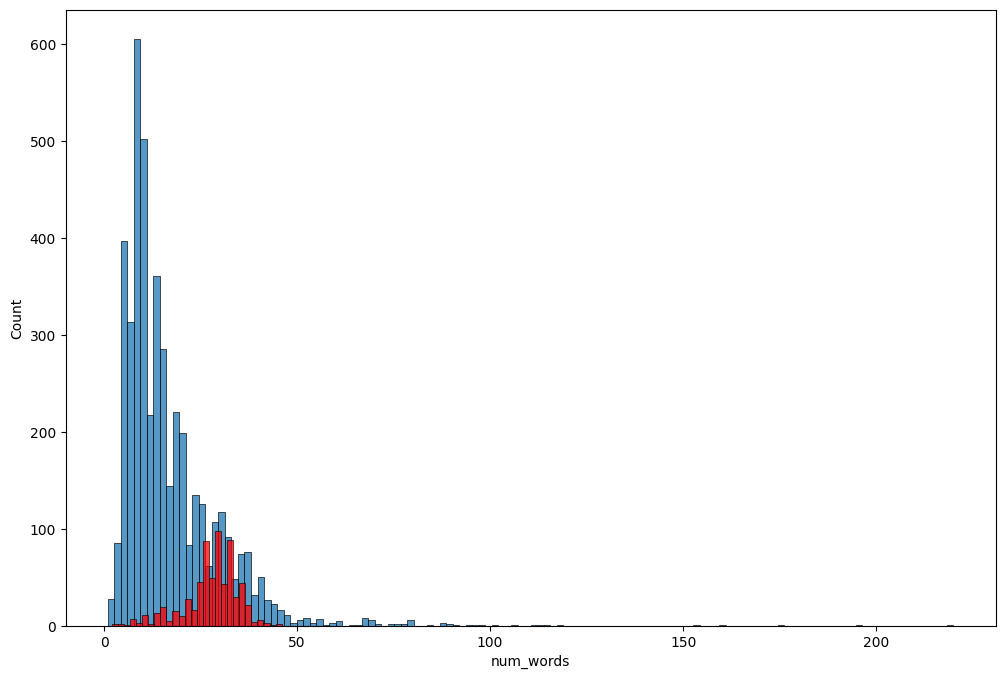

In [ ]:
plt.figure(figsize=(12,8)) # To increase the size of the graph!
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

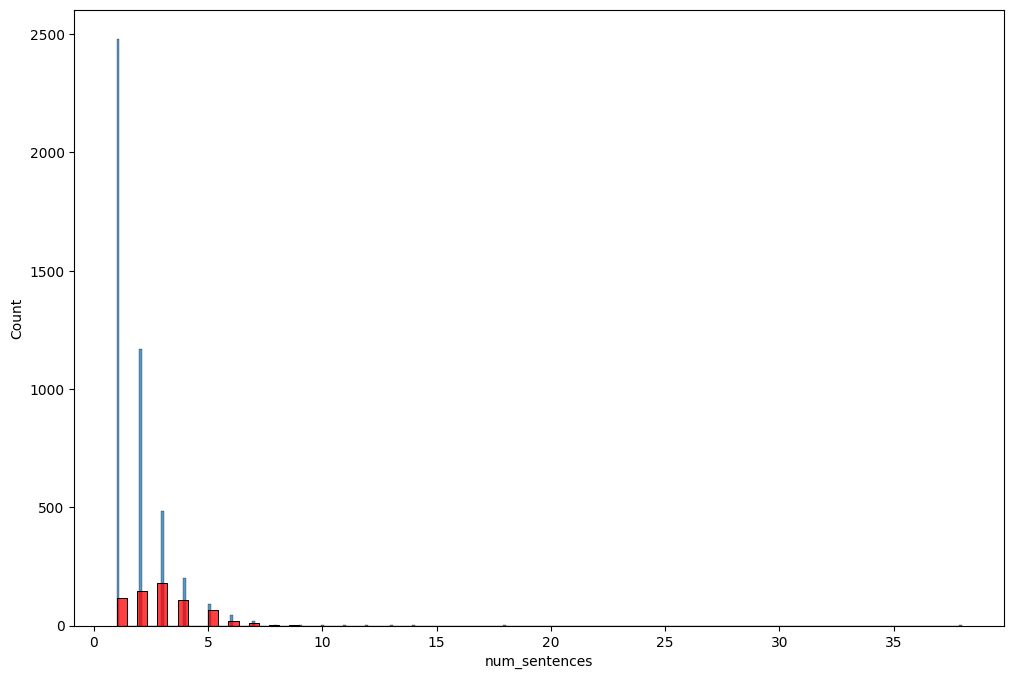

In [ ]:
plt.figure(figsize=(12,8)) # To increase the size of the graph!
sns.histplot(df[df['Target'] == 0]['num_sentences'])
sns.histplot(df[df['Target'] == 1]['num_sentences'],color='red')

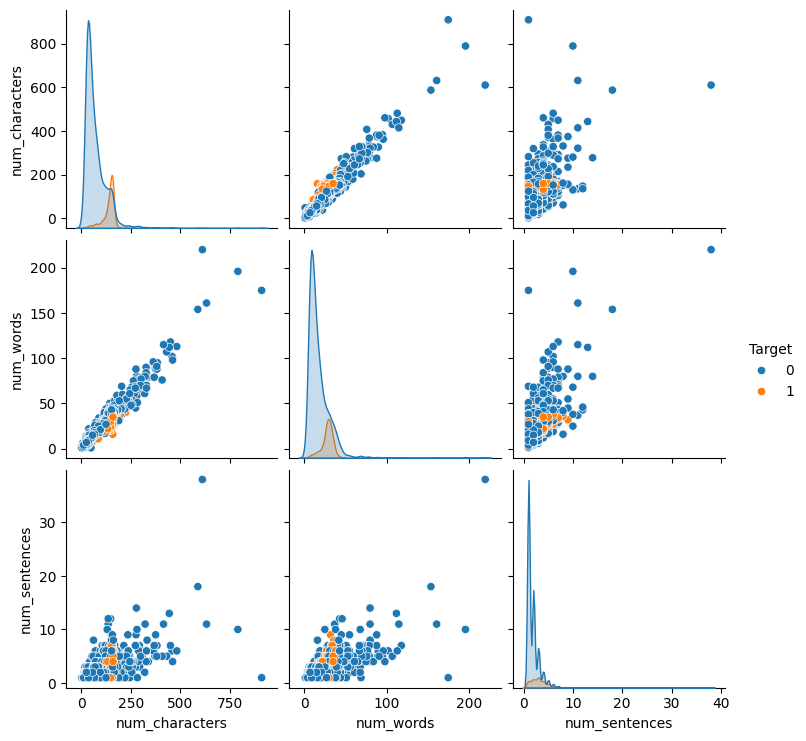

In [ ]:
# Another thing we can analyse is that, what is the relation between the num_words and num_characters and similarly other....
sns.pairplot(df,hue='Target')

3. Data Pre Processing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Imported String library for for further use in removing all the punctuations using the transform_text function!
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Singing')

'sing'

In [ ]:
def transform_text(text) :
    # Step 1 : Converting Texts to lower case
    text = text.lower()
    text = nltk.word_tokenize(text) # Tokenization

    # Step 2 : Tokenization and removing all the special characters
    y = []
    for i in text :
        if i.isalnum():
            y.append(i)

    # Step 3 : Remvoving all the stopwords and punctuations
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
transform_text('Hi My name is Ayushi Bhutani and I am 19 Years Old')

'hi name ayushi bhutani 19 year old'

In [ ]:
transform_text('This is my project of SMS Spam Detection, in Machine learning!')

'project sm spam detect machin learn'

In [ ]:
transform_text('This is my Project on SMS Spam Detection, in Machine learning!')

'project sm spam detect machin learn'

In [ ]:
df['Transformed_text'] = df['Text'].apply(transform_text)

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

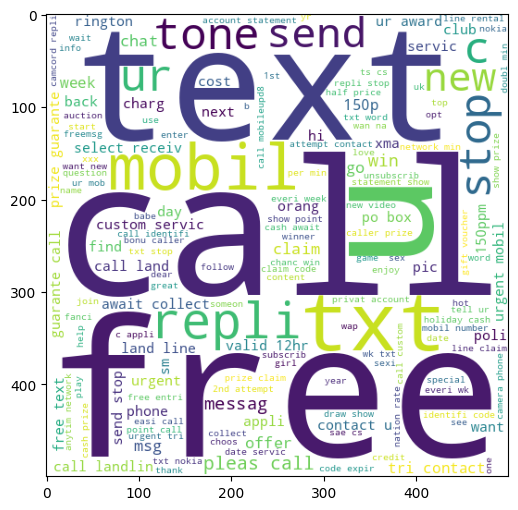

In [ ]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

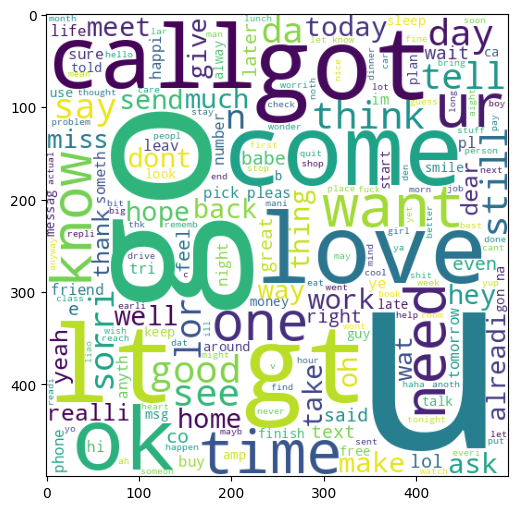

In [ ]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
# After generating the word clouds for both the spam and ham msgs, now we will find, which word is used mostly in the spam and ham msgs! in the provided data!
# We will see the top 30 words!
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9941

4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() # First we have used this vectorizer and performed the three algos and it turns out to be that bnb works the best when we use this vectorizer, but to improve the results we then switched to tfidf vectorizer...
tfidf = TfidfVectorizer()


In [ ]:
# X = cv.fit_transform(df['Transformed_text']).toarray()
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [ ]:
X.shape

(5169, 6677)

In [ ]:
y = df['Target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
# Creating objects for each model!
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
# It performs great with count vectorizer but not that good with tfidf
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))